In [7]:
import os
import sys
import numpy as np
import pandas as pd

In [28]:
from matplotlib import pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib import colors
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 18
plt.rcParams["mathtext.default"] = "rm"
plt.rcParams['text.usetex'] = True

In [5]:
df = pd.read_hdf('test_img.h5','table',start=0,stop=1000)

In [14]:
jmasses = df.loc[:,'mass'].to_numpy()

In [21]:
df.columns

Index(['img_0', 'img_1', 'img_2', 'img_3', 'img_4', 'img_5', 'img_6', 'img_7',
       'img_8', 'img_9',
       ...
       'img_1592', 'img_1593', 'img_1594', 'img_1595', 'img_1596', 'img_1597',
       'img_1598', 'img_1599', 'is_signal_new', 'mass'],
      dtype='object', length=1602)

In [23]:
is_sig = df.loc[:,'is_signal_new'].to_numpy()

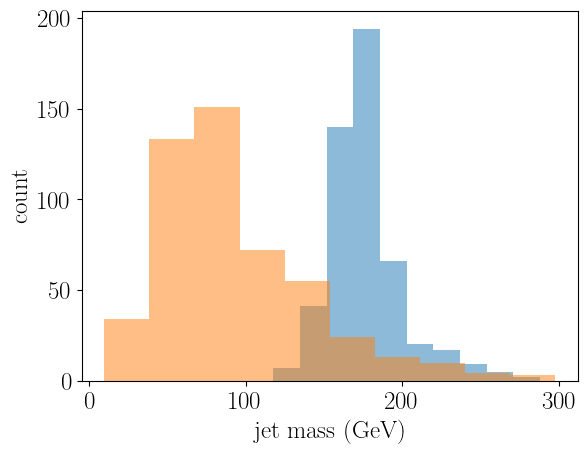

In [29]:
plt.hist(jmasses[is_sig==1], alpha=0.5)
plt.hist(jmasses[is_sig==0], alpha=0.5)
plt.xlabel('jet mass (GeV)')
plt.ylabel('count')
plt.show()

In [39]:
imgs = df.to_numpy()[:,0:1600].reshape(1000,40,40)

Text(0, 0.5, 'phi')

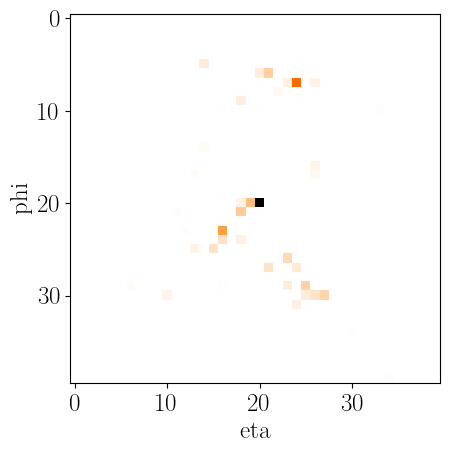

In [46]:
plt.imshow( imgs[5], cmap='gist_heat_r'  )
plt.xlabel("eta")
plt.ylabel("phi")

In [48]:
qcd_imgs = imgs[np.where(is_sig==0)]
top_imgs = imgs[np.where(is_sig==1)]

In [49]:
ave_qcd_img = qcd_imgs.mean(axis=0)
ave_top_img = top_imgs.mean(axis=0)

/tmp/ipykernel_8940/288983165.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


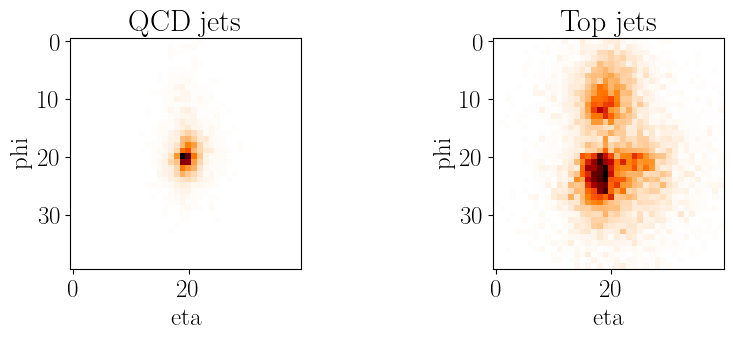

In [53]:
fig, axs = plt.subplots( 1, 2, figsize=(10,3) )
axs[0].imshow( ave_qcd_img, cmap='gist_heat_r'  )
axs[0].set_title("QCD jets")
axs[0].set_xlabel("eta")
axs[0].set_ylabel("phi")
axs[1].imshow( ave_top_img, cmap='gist_heat_r'  )
axs[1].set_title("Top jets")
axs[1].set_xlabel("eta")
axs[1].set_ylabel("phi")
fig.show()